In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2022_Feb_week4_Linear_fit_period.dat
2022_Feb_week4_Linear_fit_period.ipynb
2022_Feb_week4_Linear_fit_period_Sine_fit.py
2022_Feb_week4_Linear_fit_period_lmfit.ipynb
2022_Feb_week4_Linear_fit_period_weighted_data.ipynb
2022_Feb_week4_Mean_calculation_T0_combined.txt
2022_Feb_week4_OC_diagram.jpg
2022_Feb_week4_OC_diagram.out
2022_Feb_week4_new_ephemeris_sin_fit.ipynb
2022_Feb_week4_new_ephemeris_sin_fit.out
2022_Feb_week4_new_ephemeris_sin_fit_lmfit.ipynb
2022_Feb_week4_new_ephemeris_sin_fit_mean_data.ipynb
2022_Feb_week4_new_ephemeris_sin_fit_weight_data.txt
interporate.out


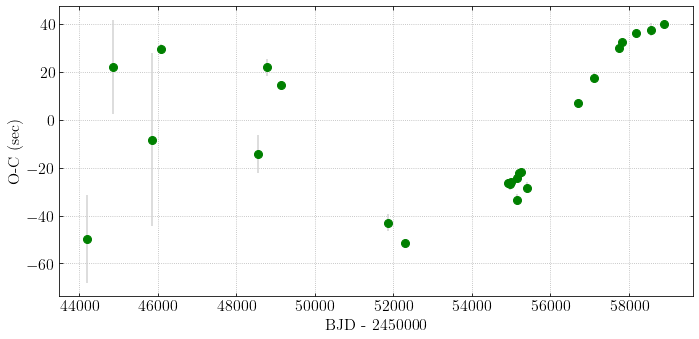

In [3]:
#Plot O-C vs BJD
Input  = '2022_Feb_week4_Mean_calculation_T0_combined.txt'
Data   = np.genfromtxt(Input)


BJD_time = Data[:,0]
OC_s = Data[:,1]
OC_s_err = Data[:,2]

 ##Plotgraph
fig=plt.figure(figsize=(10, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

x1 = min(BJD_time)
x2 = max(BJD_time)
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', color='limegreen')
plt.errorbar(BJD_time, OC_s, yerr= OC_s_err, fmt='o', markersize=8, color='green',
                    ecolor='lightgray')

#Schwope_2002
#plt.text(BJD_time_Schwope_2002[0], 300, '1979')
#plt.text(BJD_time_Schwope_2002[3], 300, '1981')
#plt.text(BJD_time_Schwope_2002[13], 300, '1984')
#plt.text(BJD_time_Schwope_2002[17], 300, '1985')
#plt.text(BJD_time_Schwope_2002[19]-100, 300, '1991')
#plt.text(BJD_time_Schwope_2002[20], 300, '1992')
#plt.text(BJD_time_Schwope_2002[22], 300, '1993')
#plt.text(BJD_time_Schwope_2002[30], 300, '2000')
#plt.text(BJD_time_Schwope_2002[32], 300, '2002')

#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
#plt.ylim(-20,20)
plt.xlabel('BJD - 2450000')
plt.ylabel('O-C (sec)')
#plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("2022_Feb_week4_OC_diagram.jpg", dpi=1000)
plt.show()

In [4]:
T0_bjd = 2448773.214849387
T0_bjd_err = 2.9890246655224374e-09
P0_day = 0.062362845136031624
P0_day_err = 2.839163568630105e-19

In [5]:
#Read data ---#1
Input = "2022_Feb_week4_Mean_calculation_T0_combined.txt"
Data   = np.genfromtxt(Input)

Epoch = (Data[:,0] - 48773.214849387)/P0_day
OC = Data[:,1]
OC_err = Data[:,2]

In [6]:
x = Epoch
y = OC
dy = OC_err

len_x = len(x)
print(len_x)

25


In [7]:
def sin_fit(x, a, b, c, d):
    return a*np.sin(b*x - c) + d

In [8]:
guess = [43.9455, 0.0000324289, -145.235, -5.46613]
params, params_covariance = optimization.curve_fit(sin_fit, x, y, guess)

a = params[0]
b = params[1]
c = params[2]
d = params[3]


da = params_covariance[0,0]
db = params_covariance[1,1]
dc = params_covariance[2,2]
dd = params_covariance[3,3]

output_fit = sin_fit(x, a, b, c, d)


print("The parameters of egress part")
print("a =", a, "+/-", da**0.5)
print("b =", b, "+/-", db**0.5)
print("c =", c, "+/-", dc**0.5)
print("d =", d, "+/-", dd**0.5)

The parameters of egress part
a = 43.12231264442203 +/- 4.7521364789694305
b = 3.541625173939323e-05 +/- 1.2411411439303868e-06
c = -146.87784431919164 +/- 0.1216846580862285
d = -12.897810666388137 +/- 3.823365993590052


In [9]:
x_min, x_max = np.amin(x), np.amax(x)
x_line = np.linspace(x_min, x_max, len_x)
y_line = sin_fit(x_line, *params)
Res = y - y_line
print(Res)

#Reduced_chisqrt
m = 4
dof = len_x - m
Chi_sqr = ((y - y_line)**2/(dy)**2)/dof
Reduced_chisq = sum(Chi_sqr)
print(Reduced_chisq)

[-27.35873019  29.80320409 -14.99184299  10.83509791 -40.95627359
  -8.22717781 -13.89340772 -64.8024844  -62.60040635 -23.83504139
  -8.90758363   5.06578992  17.67694845  18.76774657  31.74153658
  32.20686515  26.16889782   9.16145441  30.73564543  26.61523547
  24.81530073  14.8036839    9.95642822   7.46978532  11.26808088]
977.3799574949985


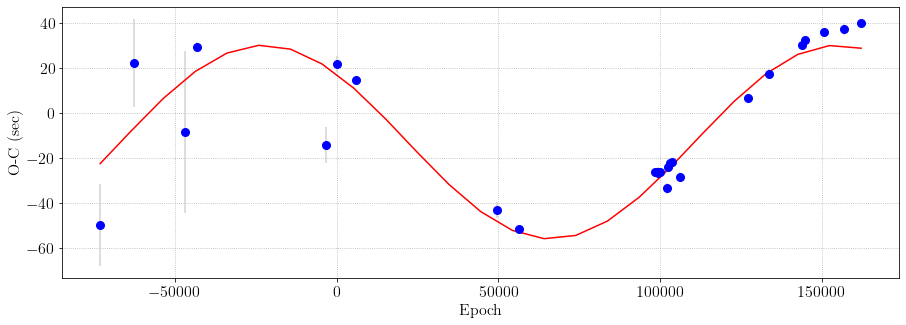

In [10]:
#Plotgraph
fig=plt.figure(figsize=(15, 5))
plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray')
# create a line plot for the mapping function
plt.plot(x_line, y_line, '-', color='red')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('Epoch')
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.show()